# Beams - catenaries

This notebook shows how to use Beam elements model a catenary.

For more info on beams see "Beams - structural beams".

This may sound strange, but a wire is just a beam without bending and torsion stiffness.

Also, to avoid the beam from coiling up, we can set the tension_only parameter to True.

In [1]:
from DAVE import *
from DAVE.jupyter import *
s = Scene();

DAVEcore version = 2.0 from c:\python\venvs\build\Lib\site-packages\DAVEcore.cp311-win_amd64.pyd
Blender found at: C:\Users\beneden\AppData\Local\Microsoft\WindowsApps\\blender-launcher.exe


In [2]:
left = s.new_frame("left", position = (0,0,10))
right = s.new_frame("right", position = (10,0,10))
cable = s.new_beam("cable", nodeA=left, nodeB = right,
                        EA = 10000,
                        EIy = 0, EIz = 0, GIp = 0,
                        L=20,
                        mass = 10,
                        tension_only = True,
                        n_segments=17)

s.solve_statics()

True

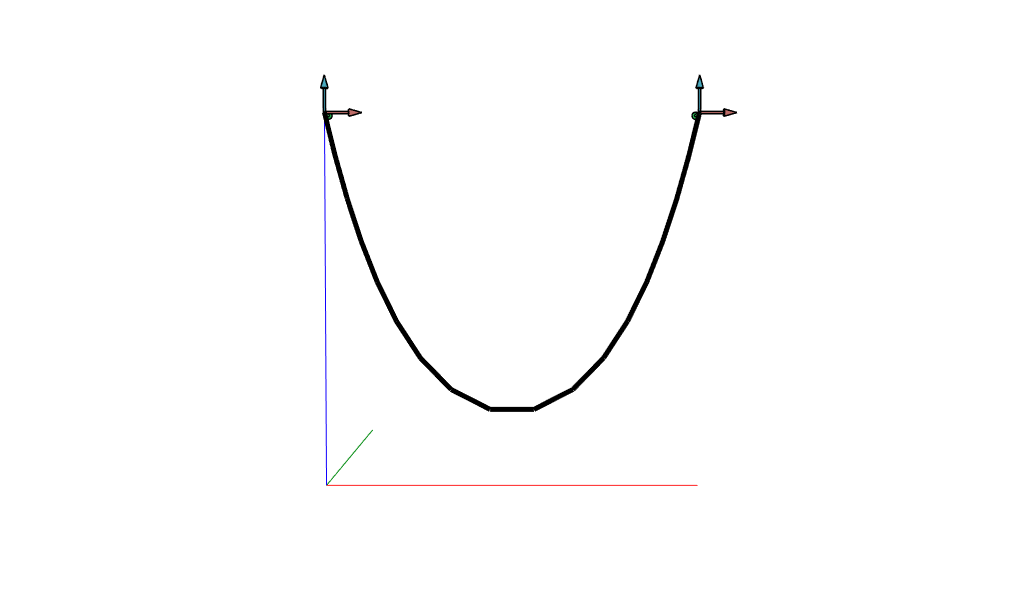

In [3]:
show(s, camera_pos=(5,-30,6), lookat = (5,0,5))

The vertical force on both ends of the cable should be half the weight

In [4]:
0.5 * s.g * cable.mass

49.033249999999995

In [5]:
right.applied_force[2]

-49.03325000946095

well, seems right

Lets see the influence of the number of segments of the cable on the horizontal force.

We could "manually" change that, but we can also use the "plot_effect" function from scene for that:

setting 1.0 results in 0.0
setting 2.0 results in -14.101550692700716
setting 3.0 results in -8.394896207817611
setting 4.0 results in -11.774223042389007
setting 5.0 results in -10.79128665362737
setting 6.0 results in -11.315221815967623
setting 7.0 results in -11.116919117306193
setting 8.0 results in -11.222281114359234
setting 9.0 results in -11.182727601311372
setting 10.0 results in -11.206635890277859
setting 11.0 results in -11.199586829372127
setting 12.0 results in -11.205891376150921
setting 13.0 results in -11.20527319989425
setting 14.0 results in -11.207402261153138
setting 15.0 results in -11.207878333757805
setting 16.0 results in -11.208858840220152
setting 17.0 results in -11.20939079216662
setting 18.0 results in -11.20997074338229
setting 19.0 results in -11.210397890195065
setting 20.0 results in -11.210793484742645


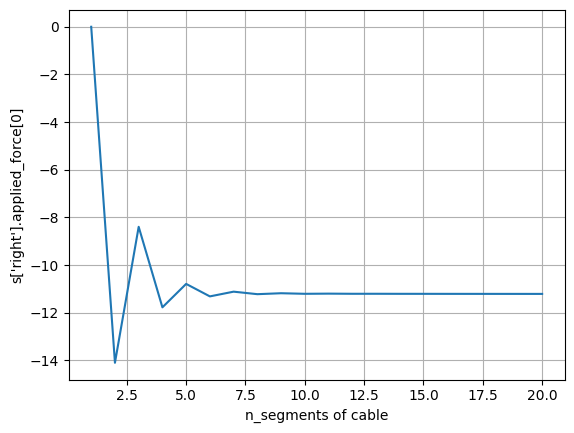

In [6]:
s.plot_effect(evaluate="s['right'].applied_force[0]",
   change_property="n_segments",
    change_node="cable",
    start=1,
    to=20.0,
    steps=20)

# graph makeup
import matplotlib.pyplot as plt
plt.grid()

Depending on the level of accuracy needed, 10 segments seems a good choice in this case.